# Import all libraries
```Importing all essential libraries for this project```

In [266]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import numpy as np
import sympy as smp

```Lets get started```

In [267]:

#Particle credentials:->

m=1
q=1
K=9*10**9

t=np.linspace(0.01,10,1000)

def acc(state,t):
    x,y,z,vx,vy,vz=state


    v=np.array([vx,vy,vz])
    global E
    g=np.array([0,0,0])

    E=np.array([0,0,0])
    #I will add the EF due to the particle itself so that i can work with cluster of particles


    global B
    B=np.array([1,0,5])

    a=(q/m)*(np.cross(v,B)+E)
    v_mod=np.linalg.norm(v)
    return vx,vy,vz,a[0],a[1],a[2]

state0=(0,0,0,1,0,0)

sol=odeint(acc,state0,t)

## Calculating some physical quantities

In [268]:
#Energy calculation
KE_list=[]
for i in range(0,1000):


    vx1,vy1,vz1=sol[i][3],sol[i][4],sol[i][5]
    v=np.linalg.norm([vx1,vy1,vz1])
    KE=0.5*m*(v**2)

    KE_list.append(KE)

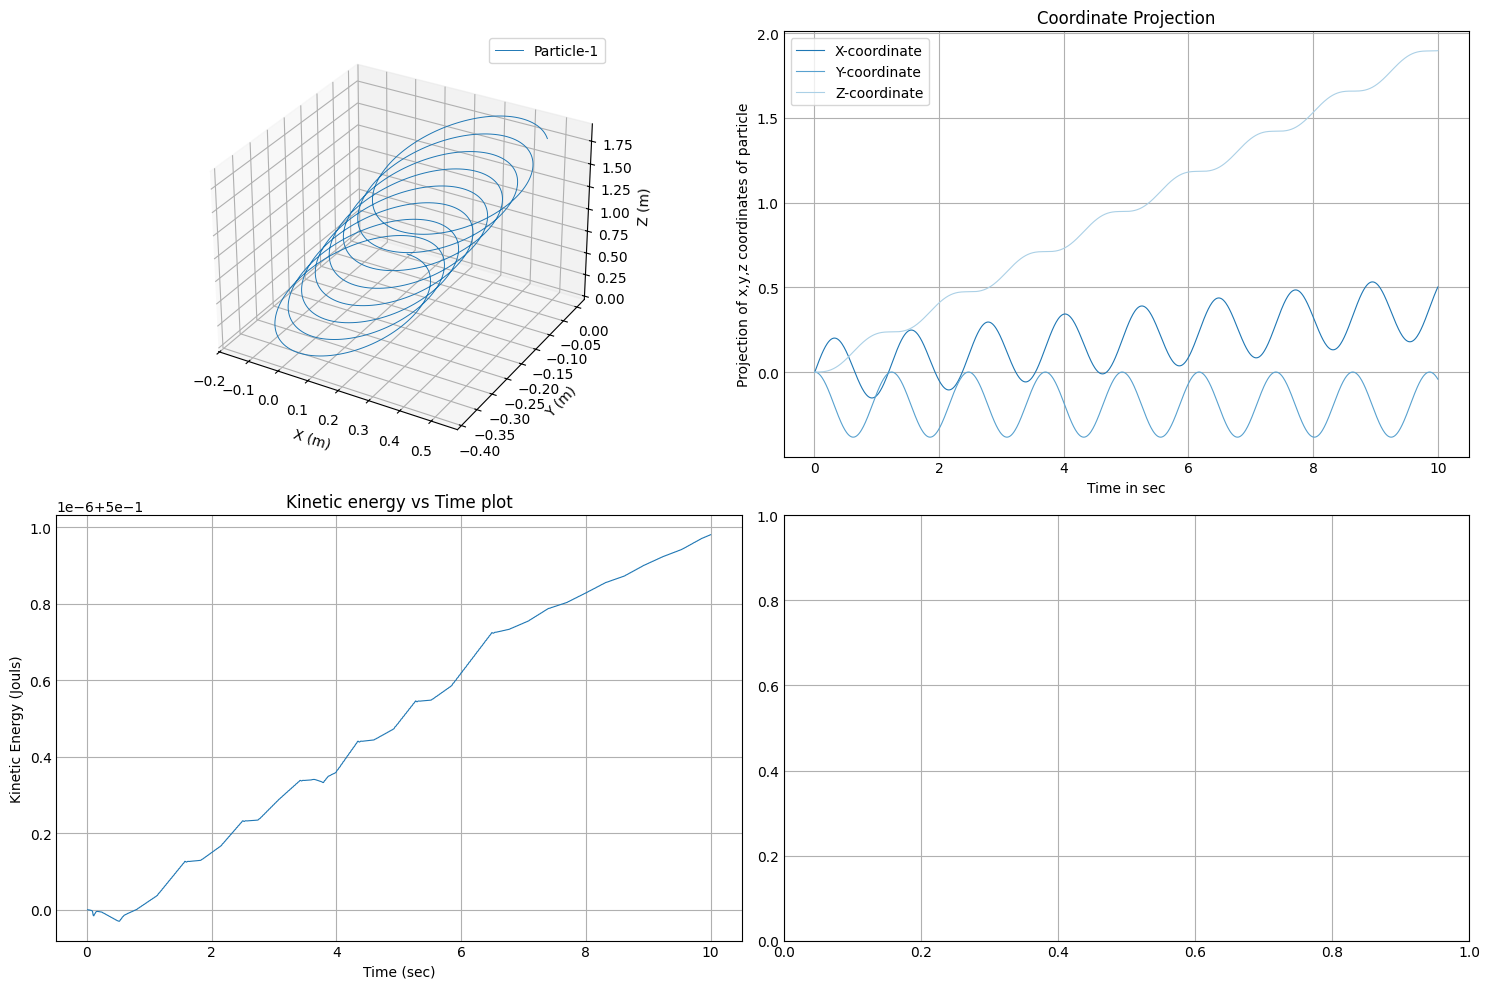

In [269]:
sol.T

fig=plt.figure(figsize=(15,10))


ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.set_xlabel("X (m)")
ax.set_ylabel("Y (m)")
ax.set_zlabel("Z (m)")

ax.plot(sol.T[0],sol.T[1],sol.T[2],linewidth=0.7,label="Particle-1")
ax.legend()

plt.subplot(2,2,2)
plt.plot(t,sol.T[0],linewidth=0.8,label="X-coordinate")
plt.plot(t,sol.T[1],linewidth=0.8,label="Y-coordinate")
plt.plot(t,sol.T[2],linewidth=0.8,label="Z-coordinate")
plt.title("Coordinate Projection")
plt.grid("True")
plt.xlabel("Time in sec")
plt.ylabel("Projection of x,y,z coordinates of particle")
plt.legend()

plt.subplot(2,2,3)
plt.plot(t,KE_list,linewidth=0.8)
plt.grid(True)
plt.xlabel("Time (sec)")
plt.ylabel("Kinetic Energy (Jouls)")
plt.title("Kinetic energy vs Time plot")
plt.subplot(2,2,4)
plt.tight_layout()

In [270]:
# Solve using solve_ivp
t_span = (0.01, 100)
y0 = state0

# Wrapper for solve_ivp which expects fun(t, y)
def acc_ivp(t, state):
    return acc(state, t)

sol_ivp = solve_ivp(acc_ivp, t_span, y0, t_eval=t, method='Radau')

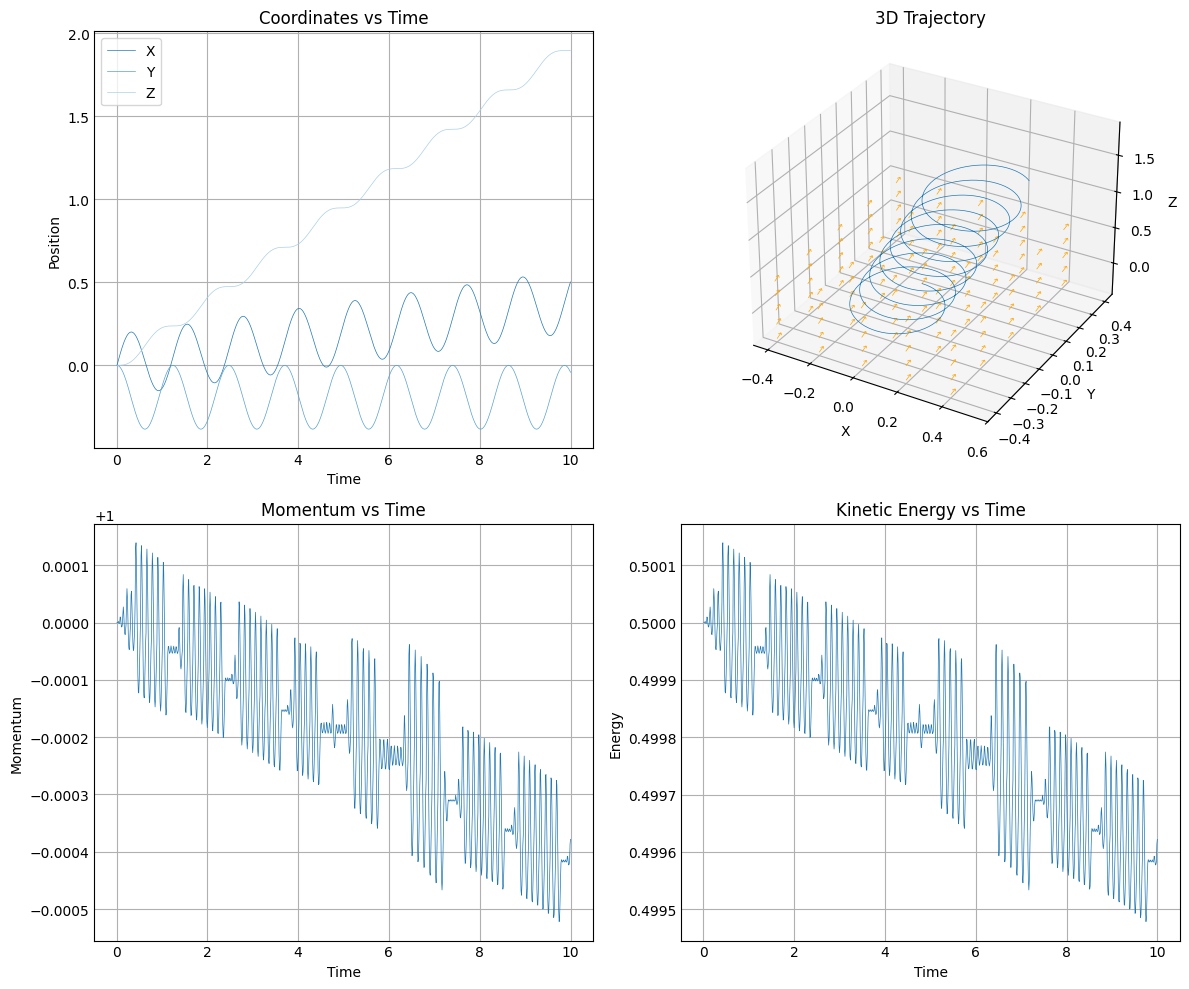

In [271]:
# Visualization
fig = plt.figure(figsize=(12, 10))

# Calculate quantities
vx = sol_ivp.y[3]
vy = sol_ivp.y[4]
vz = sol_ivp.y[5]
v_mod = np.sqrt(vx**2 + vy**2 + vz**2)
P = m * v_mod
KE = 0.5 * m * v_mod**2

# 1. Coordinates vs Time (Combined)
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(sol_ivp.t, sol_ivp.y[0],linewidth=0.5, label='X')
ax1.plot(sol_ivp.t, sol_ivp.y[1],linewidth=0.5, label='Y')
ax1.plot(sol_ivp.t, sol_ivp.y[2],linewidth=0.5, label='Z')
ax1.set_title('Coordinates vs Time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Position')
ax1.legend()
ax1.grid(True)

# 2. 3D Trajectory

n=5



x1 = np.linspace(-0.4,0.4, n)
y1 = np.linspace(-0.4,0.4, n)
z1 = np.linspace(-0.4,0.4, n)
X, Y, Z = np.meshgrid(x1, y1, z1)
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax2.plot(sol_ivp.y[0], sol_ivp.y[1], sol_ivp.y[2],linewidth=0.5)
ax2.quiver(X, Y, Z, B[0]*0.02, B[1]*0.02, B[2]*0.02,color='orange',linewidth=0.5)
ax2.set_title('3D Trajectory')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.grid(True)


# 3. Momentum vs Time
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(sol_ivp.t, P,linewidth=0.5)
ax3.set_title('Momentum vs Time')
ax3.set_xlabel('Time')
ax3.set_ylabel('Momentum')
ax3.grid(True)

# 4. Kinetic Energy vs Time
ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(sol_ivp.t, KE,linewidth=0.5)
ax4.set_title('Kinetic Energy vs Time')
ax4.set_xlabel('Time')
ax4.set_ylabel('Energy')
ax4.grid(True)

plt.tight_layout()
plt.show()

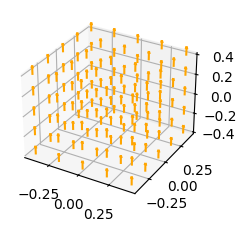

In [272]:
import matplotlib.pyplot as plt

import numpy as np


plt.style.use('_mpl-gallery')

# Make data
n = 5
x = np.linspace(-1, 1, n)
y = np.linspace(-1, 1, n)
z = np.linspace(-1, 1, n)

U = 0
V = 0
W = 0.09


# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.quiver(X, Y, Z, U, V, W,color='orange')



plt.show()